In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

## Variable Setting

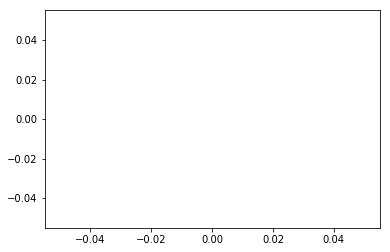

In [2]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

transformMat = np.matrix([(1.5,0),(0,-0.5)])
arrow1 = np.matrix([(1,0)])
arrow2 = np.matrix([(0,1)])

coord = np.matrix([(-1,-1),(-1,1),(1,1),(1,-1)])


In [3]:
# Background Space Visualize

def calculateCoordinate(i, nFrames):
    finalBg = np.matmul(coord, transformMat)
    finalArrow1 = np.matmul(arrow1, transformMat)
    finalArrow2 = np.matmul(arrow2, transformMat)
    diffBg =  ((finalBg - coord)/nFrames)*i
    diffArrow1 = ((finalArrow1 - arrow1)/nFrames)*i
    diffArrow2 = ((finalArrow2 - arrow2)/nFrames)*i
    
    return (diffBg, diffArrow1, diffArrow2)

def setDimensionCoord(x1,y1,x2,y2,x3,y3,x4,y4):
    patches = []
    polygon = Polygon(np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)]) ,True)
    polygon.set_color('#0099FF')
    patches.append(polygon)
    p = PatchCollection(patches, alpha=0.3)
    return p
    


In [4]:
def init():
    line.set_data([],[])
    return (line,)

In [5]:
def reset_ax():
    ax.clear()
    ax.set_xlim((-2, 2))
    ax.set_ylim((-2, 2))
    

In [6]:
nFrames = 100
nInterval = 5

In [7]:
def animate(i):
    reset_ax()
    p = setDimensionCoord(-1,-1,-1,1,1,1,1,-1)
    ax.add_collection(p)
    
    x = np.linspace(0,1,100)
    y = np.linspace(0,1,100)
    #arrow1 = plt.Arrow(0,0,1,0, 0.1, color='black')
    #arrow2 = plt.Arrow(0,0,0,1, 0.1, color='black')
    diffBg, diffArrow1, diffArrow2 = calculateCoordinate(i, nFrames)

    
    a1 = arrow1 + diffArrow1
    a2 = arrow2 + diffArrow2
    
    a1 = plt.Arrow(0,0,a1.item(0),a1.item(1))
    a2 = plt.Arrow(0,0,a2.item(0),a2.item(1))
    
    ax.add_patch(a1)
    ax.add_patch(a2)
    line, = ax.plot([], [], lw=1)
    line.set_data([], [])
    return (line,)
    

In [8]:
x1=0
x2=1
x = np.linspace(x1,x2,1000)
y1=0
y2=1
y = np.linspace(y1,y2,1000)

In [9]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames = nFrames, interval=nInterval, blit=True)

In [10]:
HTML(anim.to_jshtml())